# Data Wrangling 

## Gather

In [11]:
import pandas as pd
import numpy as np
import requests
import os
import json
%matplotlib inline
import matplotlib.pyplot as plt


###  - First file of data (Archive data)
loading the first file of data which is in source`twitter-archive-enhanced.csv`


In [3]:
archive_df=pd.read_csv('twitter-archive-enhanced.csv')
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### - Second file of data (image predictions data)
Downloading this file programatically from url`https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv` 

In [4]:
#create directory 
folder_name='tweet_image_predictions'
if not os.path.exists(folder_name):
    os.mkdir(folder_name)
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'    
response=requests.get(url)image_predictions_df
#create file to write in
with open(os.path.join(folder_name,url.split('/')[-1]),mode='wb') as file:
    file.write(response.content)
#check the file
os.listdir(folder_name)

SyntaxError: invalid syntax (<ipython-input-4-d2310e0516f1>, line 6)

In [14]:
#load dataframe of file.tsv 
image_predictions_df=pd.read_csv('tweet_image_predictions/image-predictions.tsv',sep=('\t'))
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### - Third file of data (Twitter API data)

Downloading this file programatically from twitter API

In [ ]:
import tweepy
consumer_key ='*************'
consumer_secret = '**********'
access_token = '**************'
access_secret = '**************'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)

In [ ]:
#export one tweet as a test
exp_tweet = api.get_status(archive_df.tweet_id[500], tweet_mode = 'extended')
content = exp_tweet._json
print(content)

In [5]:
#checking Keys of contents 
content.keys()


NameError: name 'content' is not defined

In [6]:
#Getting the retweet_count and favorite_count for the test tweet
exp_tweet.retweet_count , exp_tweet.favorite_count
content['user']['followers_count']

NameError: name 'exp_tweet' is not defined

In [7]:
#Creating the‘tweet_json.txt'

errors = []
if not os.path.isfile('tweet_json.txt'):
    # create the file and write on it
    with open('tweet_json.txt','w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True, wait_on_rate_limit_notify=True , tweet_mode='extended')
                json.dump(status._json,file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)



In [101]:
#no of errors
delete_old_tweets=errors
delete_old_tweets
#no od old tweets
len(delete_old_tweets)


25

In [37]:
#reading json file `tweet_json.txt`
df_list=[]
with open('tweet_json.txt','r') as file:
    for line in file:
        tweet=json.loads(line)
        tweet_id=tweet['id']
        retweet_count=tweet['retweet_count']
        favorite_count=tweet['favorite_count']
        user_count=tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id , 'retweet_count':retweet_count , 'favorite_count':favorite_count,'user_count':user_count})
    
api_df=pd.DataFrame(df_list)
api_df.head()
api_df.sample(5)

,tweet_id,retweet_count,favorite_count,user_count
166,858471635011153920,4533,20399,8868031
555,801167903437357056,5912,24501,8868040
901,755206590534418437,5271,16205,8868043
1643,682662431982772225,1044,2985,8868056
1507,690015576308211712,714,2433,8868045


In [36]:
api_df.to_csv('api_data.csv',index=False)

## Assess

Assessing below dataframes which are gathered in bave

archive_df
image_predictions_df
api_df

In [34]:
archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [38]:
image_predictions_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [39]:
image_predictions_df.p1_dog.value_counts()
image_predictions_df.p2_dog.value_counts()
image_predictions_df.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [40]:
df_false=image_predictions_df.query('p1_dog==False & p2_dog==False & p1_dog==False')

In [41]:
df_false

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
17,666104133288665088,https://pbs.twimg.com/media/CT56LSZWoAAlJj2.jpg,1,hen,0.965932,False,cock,0.033919,False,partridge,0.000052,False
18,666268910803644416,https://pbs.twimg.com/media/CT8QCd1WEAADXws.jpg,1,desktop_computer,0.086502,False,desk,0.085547,False,bookcase,0.079480,False
21,666293911632134144,https://pbs.twimg.com/media/CT8mx7KW4AEQu8N.jpg,1,three-toed_sloth,0.914671,False,otter,0.015250,False,great_grey_owl,0.013207,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2022,881268444196462592,https://pbs.twimg.com/media/DDrk-f9WAAI-WQv.jpg,1,tusker,0.473303,False,Indian_elephant,0.245646,False,ibex,0.055661,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2046,886680336477933568,https://pbs.twimg.com/media/DE4fEDzWAAAyHMM.jpg,1,convertible,0.738995,False,sports_car,0.139952,False,car_wheel,0.044173,False
2052,887517139158093824,https://pbs.twimg.com/ext_tw_video_thumb/88751...,1,limousine,0.130432,False,tow_truck,0.029175,False,shopping_cart,0.026321,False


In [42]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [114]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [43]:
archive_df.shape

(2356, 17)

In [44]:
image_predictions_df.shape

(2075, 12)

In [125]:
sum(archive_df.duplicated())

0

In [124]:
#check duplicated data
sum(image_predictions_df.duplicated())

0

In [119]:
#check missing values (nan)
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [46]:
#contents counts of column 'name'
archive_df.name.value_counts().sort_values()

Tedders        1
DonDon         1
William        1
Kathmandu      1
Socks          1
            ... 
Oliver        11
Lucy          11
Charlie       12
a             55
None         745
Name: name, Length: 957, dtype: int64

In [396]:
archive_df[archive_df.name=='None']['text']

5       Here we have a majestic great white breaching ...
7       When you watch your owner call another dog a g...
12      Here's a puppo that seems to be on the fence a...
24      You may not have known you needed to see this ...
25      This... is a Jubilant Antarctic House Bear. We...
                              ...                        
2342    Here we have a well-established sunblockerspan...
2343    Let's hope this flight isn't Malaysian (lol). ...
2344    Here we have a northern speckled Rhododendron....
2351    Here we have a 1949 1st generation vulpix. Enj...
2355    Here we have a Japanese Irish Setter. Lost eye...
Name: text, Length: 745, dtype: object

In [557]:
archive_df[archive_df.name=='a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [47]:
#checking 'rating_numerator'column contents and their counts
archive_df['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [521]:
#checking 'rating_numerator'column strange values (420 , 1776 , 204 ,960......)
archive_df.query('rating_numerator>14')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,NaN,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,NaN,None,None,None,None
285,838916489579200512,NaN,NaN,2017-03-07 00:57:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @KibaDva: I collected all the good dogs!! 1...,8.389060e+17,8.117408e+08,2017-03-07 00:15:46 +0000,https://twitter.com/KibaDva/status/83890598062...,15,10,NaN,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,NaN,None,None,None,None
291,838085839343206401,8.380855e+17,2.894131e+09,2017-03-04 17:56:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@bragg6of8 @Andy_Pace_ we are still looking fo...,NaN,NaN,NaN,NaN,15,10,NaN,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,NaN,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None


In [510]:
#checking 'rating_denominator'column contents and their counts
archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [525]:
#checking 'rating_denominator'column strange values (......)
archive_df.query('rating_denominator>40').count()

tweet_id                      12
in_reply_to_status_id          1
in_reply_to_user_id            1
timestamp                     12
source                        12
text                          12
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 12
rating_numerator              12
rating_denominator            12
name                           2
doggo                         12
floofer                       12
pupper                        12
puppo                         12
dtype: int64

In [634]:
#image_predictions_df
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [773]:
image_predictions_df.groupby('p1_conf').mean()

,tweet_id,img_num,p1_dog,p2_conf,p2_dog,p3_conf,p3_dog
p1_conf,,,,,,,
0.044333,6.666448e+17,1.0,True,4.320930e-02,True,3.890560e-02,True
0.055379,6.685075e+17,1.0,True,5.432210e-02,True,5.191340e-02,True
0.059033,7.197045e+17,1.0,False,3.829900e-02,False,3.552820e-02,False
0.063152,7.620357e+17,1.0,False,4.669210e-02,False,4.627680e-02,False
0.070076,6.704742e+17,1.0,False,6.253600e-02,False,5.889360e-02,False
...,...,...,...,...,...,...,...
0.999953,7.624645e+17,4.0,True,2.335910e-05,True,3.010330e-06,False
0.999956,6.686367e+17,1.0,True,4.309810e-05,False,2.160900e-07,False
0.999962,7.454339e+17,1.0,False,1.448950e-05,True,6.060880e-06,False


### Qulaity issues
#### `Archive data`
##### 1- Missing values :
a-(in_reply_to_status_id ,in_reply_to_user_id , retweeted_status_id,retweeted_status_user_id , retweeted_status_timestamp,expanded_urls).....drop these columns as are not in API downloaded data
b-handle None values in columns of ( dogs_stages , name )
C-add missing values columns by merging api data.  
    
##### 2- datatypes
(tweed_id ,timestamp , retweeted_status_timestamp but dropped it, rating_numerator ,  ).
##### 3- 'name' column have None value and not readable names like (a , None) so can extract them from 'text' column and convert cells with no name to nan and handle them as quality issue of missing data.
##### 4-'rating_numerator' column have outliers(large rate value for pictures that have many dogs) so should modify them
##### 5- 'dog_stage' have nan values (1976) and need to extract them from text column.
##### 6- drop rows of old tweets that did not find them in twitter API downloaded data.

`image_predictions data`
- columns names are non-descriptive so should modify their names to be clear descriptive.
- columns p1,p2,p3 contents should be lower (after reshaped the table its contents became in prediction column so make it lower)

#### Tidiness
#### `Archive data`
- Column headers in archive table are values, not variable names(doggo ,floofer,pupper,puppo)
- one observational unit stored in 2 tables( archive data & API data)so need to merge them in one observational unit .
- each observational unit forms one table so keep image_predictions data separated in one table  
#### `image_predictions data`
- columns p1,p2,p3 ,Conf,,,,, as this is tidiness issue and should be handled by reshaping the table using wide-to-long method after renaming the columns.

## Clean

In [48]:
# take copy from all dataframes to access original easly
archive_df_clean=archive_df.copy()
image_predictions_df_clean=image_predictions_df.copy()
api_df_clean=api_df.copy()


### Quality
#### Missing values 
`archive data`

#### Define
Drop columns from archive data(in_reply_to_status_id ,in_reply_to_user_id , retweeted_status_id,retweeted_status_user_id , retweeted_status_timestamp)

#### Code

In [49]:
archive_df_clean=archive_df_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1)

#### Test

In [50]:
archive_df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [51]:
archive_df_clean.shape

(2356, 12)

In [52]:
archive_df_clean.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


### Tidiness issue 1

`archive data`

#### Define
replacing None value by "" in four columns of dog stages in quality issues,create one column about dog stage and merge all 4 columns in this one 

#### Code

In [53]:
#replacing None by ""
archive_df_clean.iloc[: , -4:]=archive_df_clean.iloc[: , -4:].replace('None',"")


In [54]:
#combining four columns in one column 'dog_stage'
archive_df_clean['dog_stage']=archive_df_clean.doggo+archive_df_clean.floofer+archive_df_clean.pupper+archive_df_clean.puppo


#### Test

In [55]:
archive_df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,


In [56]:
archive_df_clean.dog_stage.value_counts()

                1976
pupper           245
doggo             83
puppo             29
doggopupper       12
floofer            9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

### Quality 
#### Four coulumns of dog stages in `archive data`

##### Define
- Deleting 4 columns of dog stages 
- Adjust classification of two stages in one like ( doggofloofer , doggopupper , doggopuppo)
- Adjust empty values to nan (to be handled later as quality issue)



##### Code

In [57]:
#deleting 4 columns
archive_df_clean=archive_df_clean.drop(['doggo','floofer' ,'pupper','puppo' ],axis=1)


In [58]:
#adjusting classification of two stages in one cell
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo-floofer'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo-pupper'
archive_df_clean.loc[archive_df_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo-puppo'

In [59]:
#adjust empty values to nan
archive_df_clean.dog_stage=archive_df_clean.dog_stage.replace('',np.nan)

##### Test

In [60]:
archive_df_clean.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN


In [480]:
#checking 'dog_stage' column contents
archive_df_clean.groupby('dog_stage').count()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name
dog_stage,,,,,,,,
doggo,83,83,83,83,80,83,83,47
doggo-floofer,1,1,1,1,1,1,1,0
doggo-pupper,12,12,12,12,12,12,12,6
doggo-puppo,1,1,1,1,1,1,1,0
floofer,9,9,9,9,9,9,9,5
pupper,245,245,245,245,243,245,245,138
puppo,29,29,29,29,28,29,29,21


Text(0, 0.5, 'Dog stage')

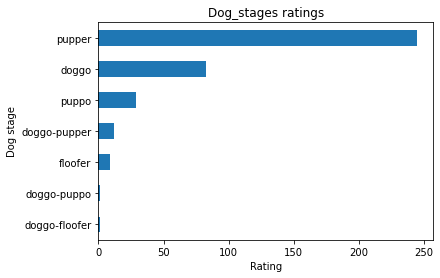

In [61]:
archive_df_clean.groupby('dog_stage').count()['rating_numerator'].sort_values().plot(kind='barh',title='Dog_stages ratings');
plt.xlabel('Rating')
plt.ylabel('Dog stage')

In [62]:
#checking 'dog_stage' column contents
archive_df_clean.dog_stage.value_counts(dropna=False)

NaN              1976
pupper            245
doggo              83
puppo              29
doggo-pupper       12
floofer             9
doggo-puppo         1
doggo-floofer       1
Name: dog_stage, dtype: int64

### Quality 
#### 'name' coulumn in `archive data`
- missing and inaccurate contents

##### Define

- use Regular Expression to extract the content of name from 'text' column
- work on (None , a ,an) values and convert them to extracted name from text column
- use Try & error to adjust no name value to nan



##### Code

In [63]:
#take copy from archive_df_clean
archive_df_clean1=archive_df_clean.copy()
archive_df_clean1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


In [64]:
#convert 'name' to be lower()
archive_df_clean1.name=archive_df_clean1.name.str.lower()

In [65]:
#use regex to extract contents from pattern 
import re
pattern = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, row in archive_df_clean1.iterrows():  
    try:
        if row['name'] == "none":
            correct_name = re.findall(pattern, row['text'])[0]
            archive_df_clean1.loc[index,'name'] = archive_df_clean1.loc[index,'name'].replace('none', correct_name)
        elif row['name'] == "a":
            correct_name = re.findall(pattern, row['text'])[0]
            archive_df_clean1.loc[index,'name'] = archive_df_clean1.loc[index,'name'].replace('a', correct_name)
        elif row['name'] == 'an':
            correct_name = re.findall(pattern, row['text'])[0]
            archive_df_clean1.loc[index,'name'] = archive_df_clean1.loc[index,'name'].replace('an', correct_name).lower()
    except IndexError:
        archive_df_clean1.loc[index,'name'] = np.nan


#### Test

In [66]:
#check nan values
archive_df_clean1.name.value_counts(dropna = False)

NaN             773
charlie          12
cooper           11
oliver           11
lucy             11
               ... 
shiloh            1
cleopatricia      1
kial              1
grizzwald         1
izzy              1
Name: name, Length: 988, dtype: int64

In [67]:
#check changes of names 
archive_df_clean1[archive_df_clean1.name=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Quality 
#### 'rating_numerator' & 'rating_denominator' columns in `archive data`

##### Define
There are 12 tweets have large values (rating_denominator>40)
- convert data type from int to float for column 'rating_numerator'
- Remove outlier values in numerator to be accurate in calulations by replacing it by deviding it by no. of dogs which yields from deviding ( rating_denominator/10) (note that this case happen when picture have many dogs so that the rating is muliplied by their no.)

##### Code

In [68]:
#convert 'rating_numerator' from int to float
archive_df_clean1['rating_numerator']=archive_df_clean1['rating_numerator'].astype(float)

In [69]:
# Calculating the dogs counts in the tweets which have many dogs
dogs_count = archive_df_clean1.rating_denominator[archive_df_clean1.rating_numerator>40]/10


In [70]:
#assign new calculation for rating_numerator 
archive_df_clean1.loc[archive_df_clean1.rating_numerator>40,['rating_numerator','rating_denominator']]=archive_df_clean1.loc[archive_df_clean1.rating_numerator>40,['rating_numerator','rating_denominator']]/dogs_count

#### Test

In [71]:
#check after change 
archive_df_clean1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2356 non-null   int64  
 1   timestamp           2356 non-null   object 
 2   source              2356 non-null   object 
 3   text                2356 non-null   object 
 4   expanded_urls       2297 non-null   object 
 5   rating_numerator    2335 non-null   float64
 6   rating_denominator  2335 non-null   float64
 7   name                1583 non-null   object 
 8   dog_stage           380 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 165.8+ KB


In [72]:
# Check the dog_count with their indices:
dogs_count

188      1.0
189      1.0
290      1.0
313      0.0
340      1.0
433      7.0
695      1.0
902     15.0
979      1.0
1120    17.0
1202     5.0
1228     9.0
1254     8.0
1274     5.0
1351     5.0
1433     4.0
1634    13.0
1635    11.0
1779    12.0
1843     8.0
2074     1.0
Name: rating_denominator, dtype: float64

In [73]:
#checking 'rating_numerator'column with values of rating_denominator>40
archive_df_clean1.query('rating_denominator>40')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


In [74]:
#checking 'rating_numerator'column contents and their counts
archive_df_clean1['rating_numerator'].value_counts()

12.0    558
11.0    464
10.0    461
13.0    351
9.0     158
8.0     102
7.0      55
14.0     54
5.0      37
6.0      32
3.0      19
4.0      17
1.0       9
2.0       9
0.0       2
15.0      2
24.0      1
27.0      1
26.0      1
17.0      1
20.0      1
Name: rating_numerator, dtype: int64

In [75]:
#checking 'rating_denominator'column contents and their counts
archive_df_clean1['rating_denominator'].value_counts()

10.0    2326
11.0       3
20.0       2
2.0        1
16.0       1
7.0        1
15.0       1
Name: rating_denominator, dtype: int64

In [76]:
#checking 'rating_numerator'column with values of rating_denominator>40
archive_df_clean1.query('rating_denominator>40')

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage


### Tidiness issue 2

`archive data` & `API data`

one observational unit stored in 2 tables( archive data & API data)is tidiness issue so need to merge them in one observational unit and at the same time adding the missing data (retweet_count & favorite_count)

#### Define
merge two data frames (archive and API)using pd.merge(df1,df2,on=(''),how=inner) inner is defualt value

#### Code

In [77]:
# taking copies of datframes
archive_df_clean2=archive_df_clean1.copy()
api_df1=api_df.copy()


In [79]:
#merging two data frames (archive and API)
df_merged=pd.merge(archive_df_clean2,api_df1,on=('tweet_id'))

#### Test

In [80]:
#testing action of merging 
df_merged.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,NaN,7509,35518,8868029
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,NaN,5574,30743,8868029


In [81]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2331 non-null   int64  
 1   timestamp           2331 non-null   object 
 2   source              2331 non-null   object 
 3   text                2331 non-null   object 
 4   expanded_urls       2272 non-null   object 
 5   rating_numerator    2310 non-null   float64
 6   rating_denominator  2310 non-null   float64
 7   name                1567 non-null   object 
 8   dog_stage           375 non-null    object 
 9   retweet_count       2331 non-null   int64  
 10  favorite_count      2331 non-null   int64  
 11  user_count          2331 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 236.7+ KB


### Quality 
#### Datatypes in  `archive data`

##### Define
need to modify data types in 
- tweet_id from int to string as not used in mathematical opertaion.
- timestamp from object to datetime format using to_datetime pandas


##### Code

In [82]:
#copy data frame 
df_merged_v1=df_merged.copy()

In [83]:
#convert tweet_id from int to string
df_merged_v1.tweet_id=df_merged_v1.tweet_id.astype(str)

In [84]:
#convert timestamp from datetime
import datetime
df_merged_v1.timestamp=pd.to_datetime(df_merged_v1.timestamp)

##### Test

In [85]:
#confirm action 
df_merged_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2331 non-null   object             
 1   timestamp           2331 non-null   datetime64[ns, UTC]
 2   source              2331 non-null   object             
 3   text                2331 non-null   object             
 4   expanded_urls       2272 non-null   object             
 5   rating_numerator    2310 non-null   float64            
 6   rating_denominator  2310 non-null   float64            
 7   name                1567 non-null   object             
 8   dog_stage           375 non-null    object             
 9   retweet_count       2331 non-null   int64              
 10  favorite_count      2331 non-null   int64              
 11  user_count          2331 non-null   int64              
dtypes: datetime64[ns, UTC](1), float64

In [651]:
df_merged_v1.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,8.924206435553362e+17,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,NaN,7509,35518,8868029
1,8.921774213063434e+17,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,NaN,5574,30743,8868029
2,8.918151813780849e+17,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,NaN,3691,23104,8868029
3,8.916895572798587e+17,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,NaN,7692,38806,8868029
4,8.913275589266883e+17,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,NaN,8293,37086,8868029


In [86]:
df_merged_v1.query("timestamp>'2017-08-01 00:00:03+00:00'")

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,NaN,7509,35518,8868029
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,NaN,5574,30743,8868029


In [89]:
df_merged_v2=df_merged_v1.copy()

In [90]:
#extract year
df_merged_v2['year'] = df_merged_v2['timestamp'].dt.year


In [91]:
df_merged_v2.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,favorite_count,user_count,year
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,NaN,7509,35518,8868029,2017
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,NaN,5574,30743,8868029,2017
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,archie,NaN,3691,23104,8868029,2017
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,darla,NaN,7692,38806,8868029,2017
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,franklin,NaN,8293,37086,8868029,2017


In [92]:
# tweets counts per years
df_merged_v2.year.value_counts()

2016    1175
2015     689
2017     467
Name: year, dtype: int64

### Quality

`image_predictions data`

#### Define
- Rename columns in `image_predictions` data to be readable using rename function
P1:prediction_1 , P2:prediction_2 , P3:prediction_3
p1_conf:confidence_1 and so on.
p1_dog:breed_1 ,p2_dog:breed_2and so on.

- drop rows of false prediction as not related to dogs by quering df_false of all breeds are false , then find index of these rows and finally drop these rows from image_predictions_df_clean_v1 
- reshape the dataframe using 'wide_to_long'

##### Code

In [93]:
image_predictions_df_clean_v1=image_predictions_df_clean

In [94]:
#rename columns
image_predictions_df_clean_v1=image_predictions_df_clean_v1.rename(columns={'p1':'prediction_1' ,'p2':'prediction_2','p3':'prediction_3','p1_conf':'confidence_1' ,'p2_conf':'confidence_2' ,'p3_conf':'confidence_3' ,'p1_dog':'breed_1' , 'p2_dog':'breed_2' ,'p3_dog':'breed_3'})

In [95]:
#find rows of condition that all breeds=false
df_false=image_predictions_df_clean_v1.query('breed_1==False & breed_2==False & breed_3==False')
#df_false.head()
#print(df_false.index)

In [96]:
#deleting rows of not related dogs as all breeds are false 
image_predictions_df_clean_v1=image_predictions_df_clean_v1.drop(df_false.index)

In [97]:
image_predictions_df_clean_v1.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'prediction_1', 'confidence_1',
       'breed_1', 'prediction_2', 'confidence_2', 'breed_2', 'prediction_3',
       'confidence_3', 'breed_3'],
      dtype='object')

### Tidiness issue 
- reshaping the data frame

##### Define
reshape the data frame of 'image_prediction ' to collect all p1,p2,p3 contents in one column and confidence1,confidence2,confidence3 in one column and breed1 and so on using wide-to-long method which this facilitate anlysis process using groupby method and save time also.

##### Code

In [98]:
# Reshaping the dataframe
reshape_df = pd.wide_to_long(image_predictions_df_clean_v1, stubnames=['prediction', 'confidence', 'breed'], 
    i=['tweet_id', 'jpg_url', 'img_num'], j='prediction_level', sep="_").reset_index()


##### Test

In [99]:
# check columns after rename
image_predictions_df_clean_v1.head(1)

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [100]:
#confirm change by checking if there is false 
image_predictions_df_clean_v1.query('breed_1==False & breed_2==False & breed_3==False')

,tweet_id,jpg_url,img_num,prediction_1,confidence_1,breed_1,prediction_2,confidence_2,breed_2,prediction_3,confidence_3,breed_3


In [101]:
#check the wide to long function after apply it
reshape_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5253 non-null   int64  
 1   jpg_url           5253 non-null   object 
 2   img_num           5253 non-null   int64  
 3   prediction_level  5253 non-null   int64  
 4   prediction        5253 non-null   object 
 5   confidence        5253 non-null   float64
 6   breed             5253 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 251.5+ KB


In [881]:
reshape_df.head()

,tweet_id,jpg_url,img_num,prediction_level,prediction,confidence,breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,1,Welsh_springer_spaniel,0.465074,True
1,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,2,collie,0.156665,True
2,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,3,Shetland_sheepdog,0.061428,True
3,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,1,redbone,0.506826,True
4,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,2,miniature_pinscher,0.074192,True


In [118]:
reshape_df.prediction.value_counts()

golden_retriever      290
Labrador_retriever    283
Chihuahua             185
Pembroke              143
Cardigan              115
                     ... 
ashcan                  1
hay                     1
television              1
leafhopper              1
grocery_store           1
Name: prediction, Length: 350, dtype: int64

In [122]:
reshape_df.prediction = x.prediction.str.lower()

In [123]:
reshape_df.head()
reshape_df.prediction.value_counts()

golden_retriever      290
labrador_retriever    283
chihuahua             185
pembroke              143
cardigan              115
                     ... 
sorrel                  1
red_fox                 1
mosquito_net            1
bagel                   1
terrapin                1
Name: prediction, Length: 350, dtype: int64

In [124]:
reshape_df.groupby('confidence').max()

,tweet_id,jpg_url,img_num,prediction_level,prediction,breed
confidence,,,,,,
2.160900e-07,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,3,ram,False
1.434470e-06,752519690950500352,https://pbs.twimg.com/media/CnF8qVDWYAAh0g1.jpg,3,3,eskimo_dog,True
2.164680e-06,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,3,menu,False
3.010330e-06,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,3,dhole,False
6.060880e-06,745433870967832576,https://pbs.twimg.com/media/ClhQJUUWAAEVpBX.jpg,1,3,wok,False
...,...,...,...,...,...,...
9.999160e-01,776088319444877312,https://pbs.twimg.com/media/CsU4NKkW8AUI5eG.jpg,3,1,web_site,False
9.999530e-01,762464539388485633,https://pbs.twimg.com/media/CpTRc4DUEAAYTq6.jpg,4,1,chow,True
9.999560e-01,668636665813057536,https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg,1,1,komondor,True


## Storing data

##### Define
-save last version from cleaned arichve data after merged with API data

In [109]:
#saving last version from archive data frame after cleaning & merging actions

df_merged_v2.to_csv('twitter_archive_master.csv',index=False)

In [129]:
#saving last version from image_prediction data
reshape_df.to_csv('image_prediction_cleaned.csv',index=False)

##### Test

In [131]:
#testing `twitter_archive_master.csv`
master_archive=pd.read_csv('twitter_archive_master.csv')


In [133]:
image_prediction_edited=pd.read_csv('image_prediction_cleaned.csv')

In [128]:
master_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            2331 non-null   int64  
 1   timestamp           2331 non-null   object 
 2   source              2331 non-null   object 
 3   text                2331 non-null   object 
 4   expanded_urls       2272 non-null   object 
 5   rating_numerator    2310 non-null   float64
 6   rating_denominator  2310 non-null   float64
 7   name                1567 non-null   object 
 8   dog_stage           375 non-null    object 
 9   retweet_count       2331 non-null   int64  
 10  favorite_count      2331 non-null   int64  
 11  user_count          2331 non-null   int64  
 12  year                2331 non-null   int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 236.9+ KB


In [135]:
image_prediction_edited.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5253 entries, 0 to 5252
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5253 non-null   int64  
 1   jpg_url           5253 non-null   object 
 2   img_num           5253 non-null   int64  
 3   prediction_level  5253 non-null   int64  
 4   prediction        5253 non-null   object 
 5   confidence        5253 non-null   float64
 6   breed             5253 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(2)
memory usage: 251.5+ KB


## Visualization

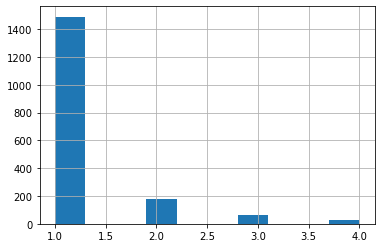

In [112]:
image_predictions_df_clean_v1.img_num.hist()

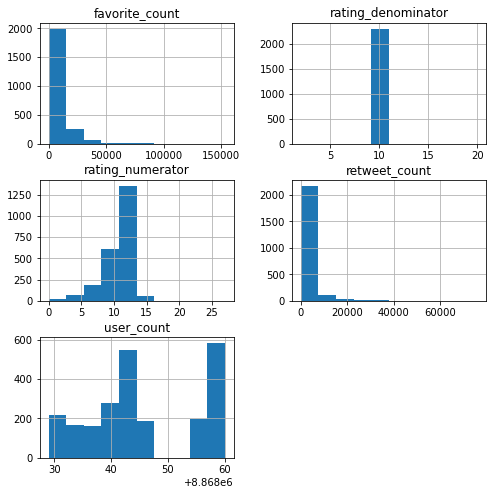

In [113]:
df_merged_v1.hist(figsize=(8, 8));

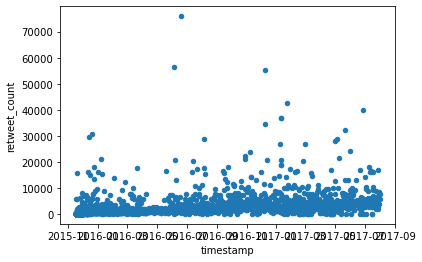

In [114]:
df_merged_v2.plot(x='timestamp',y='retweet_count',kind='scatter');

In [709]:
df_merged_v1.groupby(['rating_numerator','dog_stage']).count()['tweet_id']

rating_numerator  dog_stage    
3.0               pupper            1
5.0               doggo-pupper      1
                  pupper            1
6.0               pupper            1
7.0               pupper            9
8.0               doggo             4
                  pupper           14
9.0               pupper           16
                  puppo             1
10.0              doggo             8
                  doggo-pupper      1
                  floofer           1
                  pupper           54
                  puppo             3
11.0              doggo            21
                  doggo-floofer     1
                  doggo-pupper      1
                  floofer           2
                  pupper           57
                  puppo             2
12.0              doggo            17
                  doggo-pupper      8
                  floofer           3
                  pupper           58
                  puppo            10
13.0              

Text(0, 0.5, 'Rating')

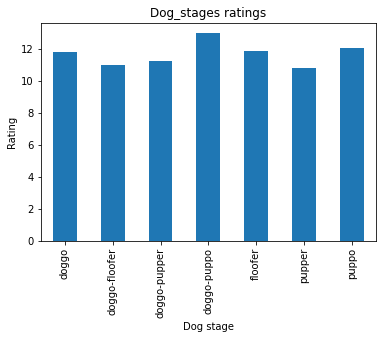

In [139]:
# The mean rating of each doge_stage with groupby
df_merged_v1.groupby('dog_stage').mean().rating_numerator.plot(kind='bar' ,title='Dog_stages ratings');
plt.xlabel('Dog stage') 
plt.ylabel('Rating')

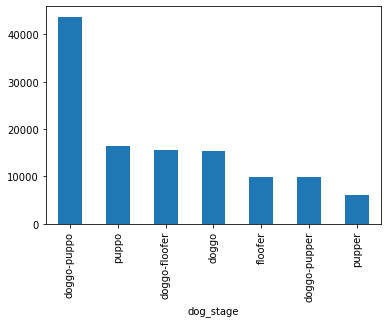

In [140]:
df_merged_v1.groupby('dog_stage').mean().favorite_count.sort_values(ascending=False).plot(kind='bar');

In [141]:
df_merged_v1.groupby(['dog_stage','favorite_count']).mean()

rating_numerator  rating_denominator  retweet_count  \
dog_stage favorite_count                                                        
doggo     0                      11.833333                10.0   12241.166667   
          684                    13.000000                10.0      27.000000   
          689                    11.000000                10.0      98.000000   
          755                    12.000000                10.0      54.000000   
          2285                   11.000000                10.0     616.000000   
...                                    ...                 ...            ...   
puppo     21556                  13.000000                10.0    7264.000000   
          31690                  13.000000                10.0    9169.000000   
          44248                  13.000000                10.0    8913.000000   
          56430                  14.000000                10.0   17369.000000   
          130688                 13.000000                10.0   42751.000000   

                            user_count  
dog_stage favorite_count                
doggo     0               8.868037e+06  
          684             8.868044e+06  
          689             8.868040e+06  
          755             8.868042e+06  
          2285            8.868043e+06  
...                                ...  
puppo     21556           8.868041e+06  
          31690           8.868031e+06  
          44248           8.868030e+06  
          56430           8.868035e+06  
          130688          8.868036e+06  

[344 rows x 4 columns]